In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
mpl.rcParams['font.size'] = 20

def cacu_alpha(x,y):
    
    Phi_c= np.arctan(1/(x+1j*y))
    phi_r_c = np.real(Phi_c)
    phi_i_c = np.imag(Phi_c)
    alpha = x*np.sinh(phi_i_c)/(np.sin(phi_r_c))

    return alpha



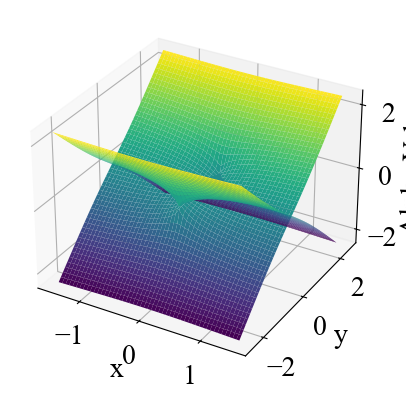

In [3]:
# 定义 x 和 y 的范围
x_range = np.linspace(-1.5, 1.5, num=200)
y_range = np.linspace(-2.5, 2.5, num=200)

# 初始化存储 alpha 值的二维数组
alpha_values = np.zeros((len(x_range), len(y_range)))

# 双循环遍历 x 和 y 的范围
for i, x_val in enumerate(x_range):
    for j, y_val in enumerate(y_range):
        alpha_values[j, i] = cacu_alpha(x_val, y_val)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 创建一个新的图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建网格
X, Y = np.meshgrid(x_range, y_range)
Z = alpha_values

# 绘制三维图
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, -Z, cmap='viridis')
# 设置标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Alpha Values')
# 显示图形
plt.show()


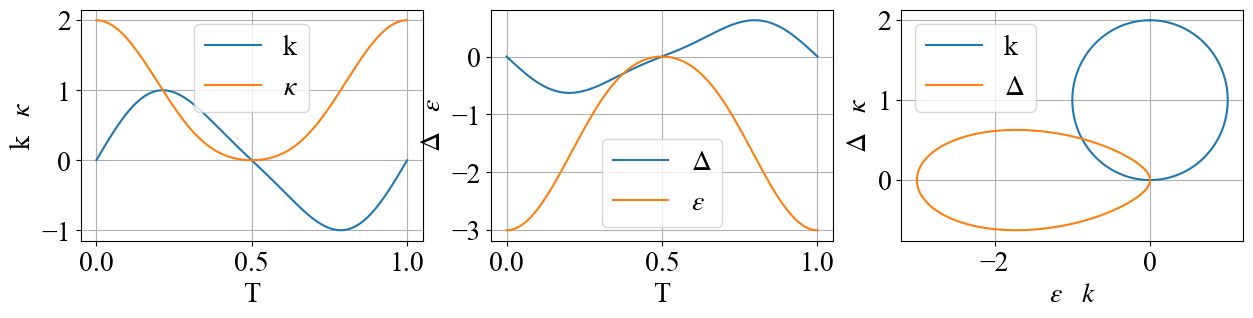

In [6]:
def p_x(r,omega,phi_0,t):
    return r*np.sin(omega*t+phi_0)

def p_y(r,omega,phi_0,t):
    return 1-r*np.cos(omega*t+phi_0)

def cacu_delta(alpha,phi_i,phi_r):
    delta = alpha*np.sinh(phi_i)*np.sin(phi_r)
    return delta

def cacu_epsu(alpha,phi_i,phi_r):
    epsu = alpha*np.cosh(phi_i)*np.cos(phi_r)
    return epsu

def cacu_kappa(alpha,phi_i,phi_r):
    kappa = alpha*np.sinh(phi_i)*np.cos(phi_r)
    return kappa

def cacu_k(alpha,phi_i,phi_r):
    k = alpha*np.cosh(phi_i)*np.sin(phi_r)
    return k

def calculate_fidelity(state1, state2):
    return np.abs(np.dot(state1.T, state2))**2

def full_hami(alpha,phi_i,phi_r):
    k = cacu_k(alpha,phi_i,phi_r)
    delta = cacu_delta(alpha,phi_i,phi_r)
    epsu = cacu_epsu(alpha,phi_i,phi_r)
    kappa = cacu_kappa(alpha,phi_i,phi_r)
    hami = np.array([[(epsu-1j*delta),(k+1j*kappa)],[(k+1j*kappa),-(epsu-1j*delta)]])
    return hami

def pseu_hami(t):
    T = 50;
    omega = np.pi / T;
    r = 0.5;
    phi_0 = np.pi;
    x = r*np.sin(omega*t+phi_0);
    y = 1-r*np.cos(omega*t+phi_0);
    phi_c= np.arctan(1/(x+1j*y));
    phi_r = np.real(phi_c);
    phi_i = np.imag(phi_c);
    alpha = x*np.sinh(phi_i)/(np.sin(phi_r));
    H = alpha*np.array([[np.cos(phi_c),np.sin(phi_c)],[np.sin(phi_c),-np.cos(phi_c)]])
    return H

t_list = np.linspace(0,1,1000)
omega = 2*np.pi
r = 0.5
phi_0 = np.pi
delta = []
epsu = []
kappa = []
k = []

for i,t in enumerate(t_list):
    p_x_val = p_x(r,omega,phi_0,t) 
    p_y_val = p_y(r,omega,phi_0,t)
    alpha = cacu_alpha(p_x_val,p_y_val)
    Phi = np.arctan(1/(p_x_val+1j*p_y_val))
    phi_r = np.real(Phi)
    phi_i = np.imag(Phi)
    delta.append(2*cacu_delta(alpha,phi_i,phi_r))
    epsu .append((2*cacu_epsu(alpha,phi_i,phi_r)))
    kappa.append(2*cacu_kappa(alpha,phi_i,phi_r))
    k.append(2*cacu_k(alpha,phi_i,phi_r))

import matplotlib.pyplot as plt

# 创建一个包含三个子图的图形
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

# 在第一个子图上绘制数据
ax1.plot(t_list, k, label='k')
ax1.plot(t_list, kappa, label=f'$\kappa$')
ax1.set_xlabel('T')
ax1.set_ylabel(f'k$\quad\kappa$')
ax1.legend()
ax1.grid()

# 在第二个子图上绘制数据
ax2.plot(t_list, delta, label=f'$\Delta$')
ax2.plot(t_list, epsu, label=f'$\epsilon$')
ax2.set_xlabel('T')
ax2.set_ylabel(f'$\Delta\quad \epsilon$')
ax2.legend()
ax2.grid()

# 在第三个子图上绘制数据
ax3.plot(k, kappa, label='k')
ax3.plot(epsu, delta, label=f'$\Delta$')
ax3.set_xlabel(r'$\epsilon\quad\it{k}$')
ax3.set_ylabel(f'$\Delta\quad\kappa$')
ax3.legend()
ax3.grid()
plt.savefig('PRL133,113802.png')
# 显示图形
plt.show()

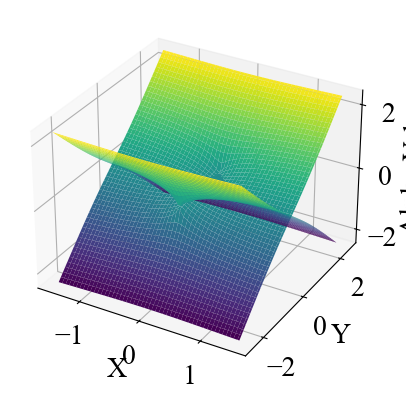

array([[-2.5       , -2.5       , -2.5       , ..., -2.5       ,
        -2.5       , -2.5       ],
       [-2.44949495, -2.44949495, -2.44949495, ..., -2.44949495,
        -2.44949495, -2.44949495],
       [-2.3989899 , -2.3989899 , -2.3989899 , ..., -2.3989899 ,
        -2.3989899 , -2.3989899 ],
       ...,
       [ 2.3989899 ,  2.3989899 ,  2.3989899 , ...,  2.3989899 ,
         2.3989899 ,  2.3989899 ],
       [ 2.44949495,  2.44949495,  2.44949495, ...,  2.44949495,
         2.44949495,  2.44949495],
       [ 2.5       ,  2.5       ,  2.5       , ...,  2.5       ,
         2.5       ,  2.5       ]])

In [5]:
# 定义 x 和 y 的范围
x_range = np.linspace(-1.5, 1.5, num=100)
y_range = np.linspace(-2.5, 2.5, num=100)

# 初始化存储 alpha 值的二维数组
alpha_values = np.zeros((len(x_range), len(y_range)))

# 双循环遍历 x 和 y 的范围
for i, x_val in enumerate(x_range):
    for j, y_val in enumerate(y_range):
        alpha_values[j, i] = cacu_alpha(x_val, y_val)


from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 创建一个新的图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建网格
X, Y = np.meshgrid(x_range, y_range)
Z = alpha_values

# 绘制三维图
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, -Z, cmap='viridis')
# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Alpha Values')

# 显示图形

plt.show()
Y